# Intro Python - Machine Learning

In [3]:
# Import all of the important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
import statsmodels.api as sm

In [4]:
# import data set
flower_data = pd.read_csv("IRIS.csv")
flower_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Supervised Machine Learning - Linear Regression

Supervised machine learning is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately

In [5]:
# Linear Regression Model
x = flower_data[['petal_length','petal_width']]
y = flower_data[['sepal_length']]

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
    
# with statsmodels
x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
 
print_model = model.summary()
print(print_model)

Intercept: 
 [4.18950102]
Coefficients: 
 [[ 0.54099383 -0.31667117]]
                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     240.8
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           4.10e-47
Time:                        19:17:08   Log-Likelihood:                -75.049
No. Observations:                 150   AIC:                             156.1
Df Residuals:                     147   BIC:                             165.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [6]:
values_want_predict = pd.DataFrame({"petal_length": [1.4, 1.5], "petal_width": [0.2, 0.3]}, index = ["test1", "test2"])
values_want_predict["Predict_Sepal_Length"] = 4.189 + (values_want_predict.petal_length * 0.541) + (values_want_predict.petal_width * -0.317)

values_want_predict

,petal_length,petal_width,Predict_Sepal_Length
test1,1.4,0.2,4.8830
test2,1.5,0.3,4.9054


## Supervised Machine Learning - Nonlinear Regression

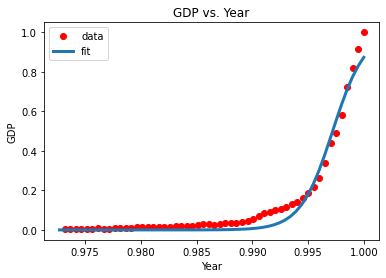

In [7]:
from scipy.optimize import curve_fit
df = pd.read_csv("china_gdp.csv")

# have to determine which equation works best based on graph first - in this case it is a logistic function
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    # could also be y = Beta_1 + x*Beta_2
    # could also be y = Beta_1 + Beta_2*(x**2)
    return y

x_data = df["Year"].values
y_data = df["Value"].values

xdata = x_data/max(x_data)
ydata = y_data/max(y_data)
popt, pcov = curve_fit(sigmoid, xdata, ydata)

x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')

plt.legend()
plt.title('GDP vs. Year')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [8]:
values_want_predict = pd.DataFrame({"petal_length": [0.98, 0.995]}, index = ["test1", "test2"])
beta1 = popt[[0]]
beta2 = popt[[1]]

values_want_predict["Predict_GDP"] = 1 / (1 + np.exp( -beta1 * (values_want_predict.petal_length - beta2)))

values_want_predict

,petal_length,Predict_GDP
test1,0.980,0.000007
test2,0.995,0.178886


## Unsupervised Machine Learning

Unsupervised machine learning uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention

In [9]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# import data set
flower_data = pd.read_csv("IRIS.csv")
flower_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Elbow Method

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.
We now demonstrate the given method using the K-Means clustering technique using the Sklearn library of python.  Although it isn't necessary in this situation (because we already know that there are 3 species already, it is nice to know how to do it if you didn't know the amount of cluster groups.

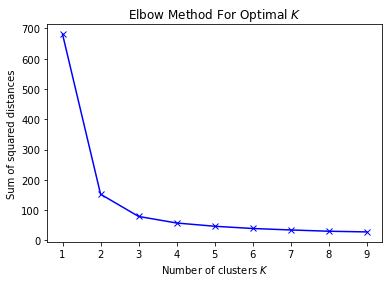

In [10]:
x_vars = flower_data[['sepal_length','sepal_width','petal_length','petal_width']]
y_vars = flower_data["species"]
X_train, X_test, y_train, y_test = train_test_split( x_vars, y_vars, test_size = 0.20, random_state = 53)

# Search for "optimal" number of clusters
SS_dist = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x_vars)
    SS_dist.append(kmeans.inertia_)
plt.plot(K,SS_dist,'bx-')
plt.xlabel('Number of clusters $K$') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal $K$')
plt.show()

### Clustering Groups - PCA

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space.

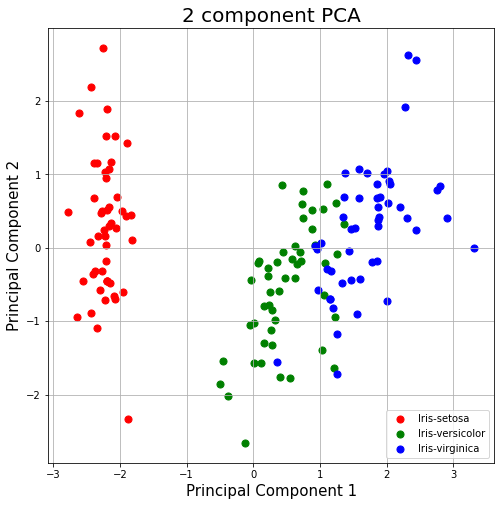

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separating out the features
x = flower_data.loc[:, features].values
# Separating out the target
y = flower_data.loc[:,['species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, flower_data[['species']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()


### Clustering Groups - TSNE

T-distributed neighbor embedding (t-SNE) is a dimensionality reduction technique that helps users visualize high-dimensional data sets. It takes the original data that is entered into the algorithm and matches both distributions to determine how to best represent this data using fewer dimensions. t-SNE is another dimensionality reduction algorithm but unlike PCA is able to account for non-linear relationships

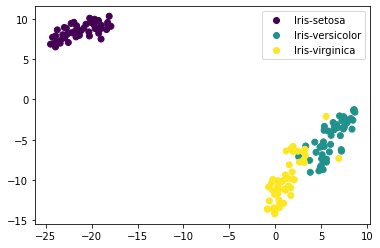

In [12]:
numbers_only = flower_data[['sepal_length','sepal_width','petal_length','petal_width']]
new_labels = [
    (flower_data["species"] == "Iris-setosa"),
    (flower_data["species"] == "Iris-versicolor"),
    (flower_data["species"] == "Iris-virginica")
]
des_labels = [0,1,2] 
data_labels = np.select(new_labels, des_labels)


model_tsne = TSNE(n_components = 2) 
transformed = model_tsne.fit_transform(numbers_only)


scatter = plt.scatter(transformed[:,0], transformed[:,1], c=data_labels);
plt.legend(handles=scatter.legend_elements()[0], labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

### K-Nearest Neighbors
Now we need to determine how many surrrounding points are references when predicting a new data point. Now we need to determine how many surrrounding points are references when predicting a new data point. Choosing a small value of K leads to unstable decision boundaries. The substantial K value is better for classification as it leads to smoothening the decision boundaries. We want to choose a k-value whose error is low. 

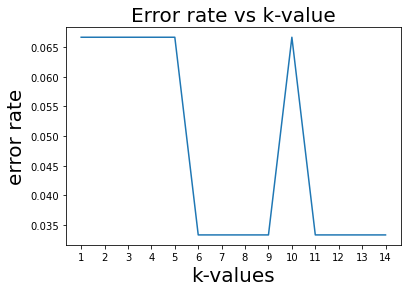

In [13]:
X_train, X_test, y_train, y_test = train_test_split( x_vars, y_vars, test_size = 0.20, random_state = 53)

error_rate=[] #list that will store the average error rate value of k
for i in range (1,15):  
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    pred_i = clf.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,15),error_rate)
plt.title("Error rate vs k-value",fontsize=20)
plt.xlabel("k-values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,15))
plt.show()